In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1

In [38]:
df = pd.read_excel('train.xlsx')

In [39]:
df.head(15)

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
5,1298,2018-12-30,Стандарт,Калиниград,Binders,7366.876
6,5092,2018-12-30,Стандарт,Калиниград,Fasteners,42478.360
7,1878,2018-12-29,Стандарт,Калиниград,Chairs,11542.820
8,1879,2018-12-29,Стандарт,Калиниград,Phones,1783.405
9,2875,2018-12-29,Первый класс,Владивосток,Fasteners,26200.090


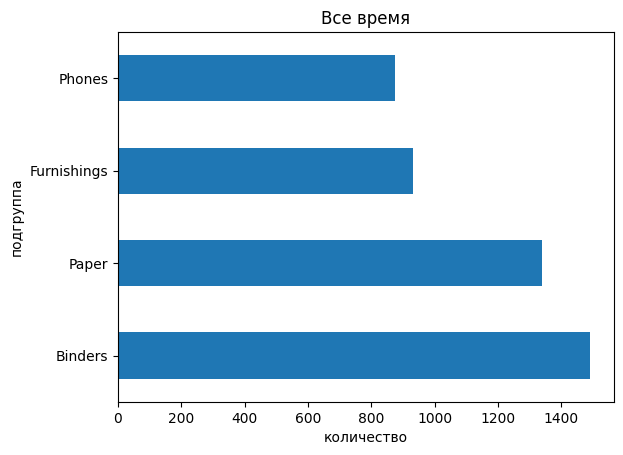

In [40]:
df_1 = df['Sub-Category'].value_counts()
top_4_groups = df_1.nlargest(4)
top_4_groups.plot.barh(xlabel='количество', ylabel='подгруппа', title='Все время');

In [41]:
#Ищем годы, которые представленны в датафрейме
dates = df.groupby(df['Order Date'].dt.year).count().index.values
dates

array([2015, 2016, 2017, 2018], dtype=int32)

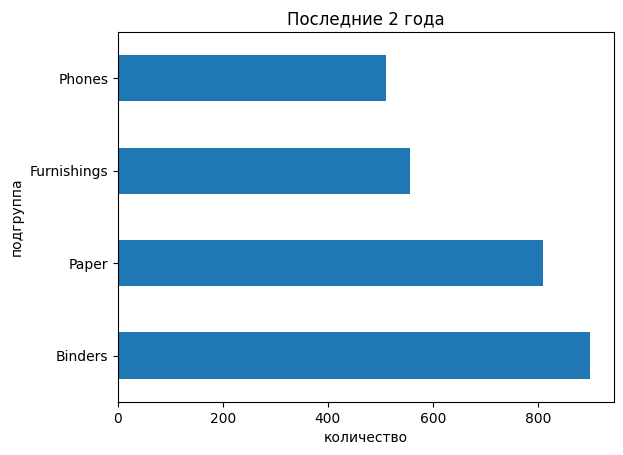

In [42]:
df_last_2years = df[df['Order Date'].dt.year >= dates[-2]]
df_2 = df_last_2years['Sub-Category'].value_counts()
top_4_for_2_years = df_2.nlargest(4)

top_4_for_2_years.plot.barh(xlabel='количество', ylabel='подгруппа', title='Последние 2 года');

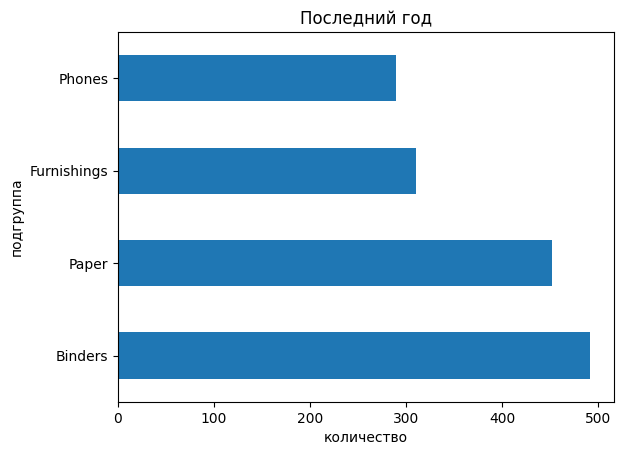

In [43]:
df_last_year = df[df['Order Date'].dt.year >= dates[-1]]
df_3 = df_last_year['Sub-Category'].value_counts()
top_4_for_last_year = df_3.nlargest(4)

top_4_for_last_year.plot.barh(xlabel='количество', ylabel='подгруппа', title='Последний год');


**Вывод:** Независимо от выборки лет самыми популярными категориями товаров были неизменно: Binders, papers, Furnishings, Phones.

По графикам видно, что каждый год продается примерно одинаковое количество товаров увеличивается в этих группах.

## Задание 2

In [44]:
df['Sales'].describe()

,Sales
count,9800.000000
mean,22921.757737
std,12601.999815
min,1002.794000
25%,12135.625000
50%,22882.060000
75%,33730.130000
max,44995.410000


<Axes: ylabel='Frequency'>

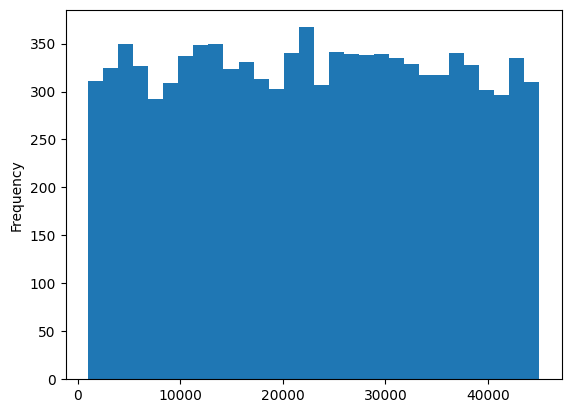

In [45]:
df['Sales'].plot.hist(bins=30)

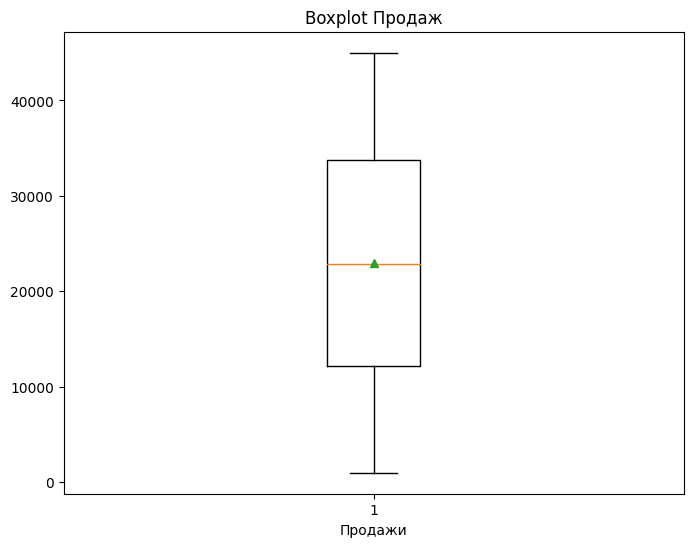

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'], showmeans=True)
plt.title('Boxplot Продаж')
plt.xlabel('Продажи')
plt.show()

**Вывод:** все величины распредлены одинаково.
Среднее значение величин: 22921.757737

Никаких выбросов и аномалий не обнаружено

## Задание 3

                                mean  count
Region      Sale_group                     
Владивосток Малые        8286.515222    945
            Средние     22974.767613    884
            Высокие     37460.497312    956
Калиниград  Малые        8548.667623   1038
            Средние     23012.267795   1093
            Высокие     37566.277532   1009
Москва      Малые        8217.246938    518
            Средние     22865.475168    536
            Высокие     37461.806820    544
Урал        Малые        8380.229930    766
            Средние     22816.742855    753
            Высокие     37280.111082    758


<ipython-input-47-8cf1d0f2ad8b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Region', 'Sale_group'])


<Figure size 1000x600 with 0 Axes>

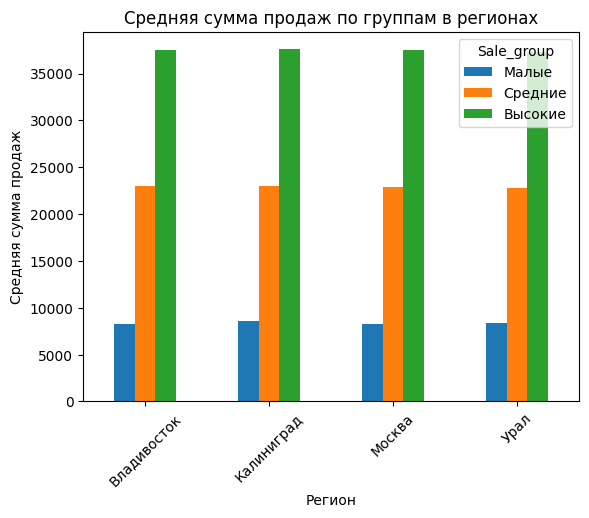

In [47]:
#Разбиваем продажи на группы
#Используем квантили для разделения данных на три равные части:
df['Sale_group'] = pd.qcut(df['Sales'], q=3, labels=['Малые', 'Средние', 'Высокие'])

#Группируем данные по региону и группе продаж
grouped = df.groupby(['Region', 'Sale_group'])

#Анализируем основные тенденции и паттерны
#Сводная таблица:
summary_table = grouped['Sales'].agg(['mean', 'count']);
print(summary_table)

#Визуализация:
plt.figure(figsize=(10, 6))
grouped['Sales'].mean().unstack().plot(kind='bar')
plt.title('Средняя сумма продаж по группам в регионах')
plt.xlabel('Регион')
plt.ylabel('Средняя сумма продаж')
plt.xticks(rotation=45)
plt.legend(title='Sale_group')
plt.show();



In [48]:
#Выделяем наиболее "прибыльную" группу
profit_by_group = grouped['Sales'].sum().unstack()
most_profitable_group = profit_by_group.idxmax(axis=1)
print(f"Наиболее прибыльная группа в каждом регионе:\n{most_profitable_group}")

Наиболее прибыльная группа в каждом регионе:
Region
Владивосток    Высокие
Калиниград     Высокие
Москва         Высокие
Урал           Высокие
dtype: category
Categories (3, object): ['Малые' < 'Средние' < 'Высокие']


Все покупки были разбиты на три группы и сгруппированы по городам и группам.
Графики выглядят правктически одинакого, что говорит о том, что в каждом городе похожая картина с продажами. В анализе не учитывались Классы(столбец Class)

**Вывод:** по результат исследования было выявлено, что самыми прибыльными являются "высокая" подгруппа